# اتصال به گوگل درایو

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# فراخوانی کتابخانه های مورد نیاز

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_recall_fscore_support
from sklearn.metrics import f1_score,roc_auc_score
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from xgboost import plot_importance

# تنظیمات

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
pd.set_option('display.max_columns', None)

# فراخوانی مجموعه داده

In [5]:
df = pd.read_csv('/content/drive/MyDrive/مواد پایان نامه/مجموعه داده های نمونه گیری شده/iot23-sampled-raw.csv')

## مشاهده‌ی نمونه سطر‌هایی از مجموعه

In [6]:
df

,Unnamed: 0,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,resp_bytes,conn_state,local_orig,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
0,0,1.540469e+09,CGm6jB4dXK71ZDWUDh,192.168.1.132,58687.0,216.239.35.4,123.0,udp,-,0.114184,48,48,SF,-,-,0.0,Dd,1.0,76.0,1.0,76.0,Benign
1,1,1.540469e+09,CnaDAG3n5r8eiG4su2,192.168.1.132,1900.0,239.255.255.250,1900.0,udp,-,160.367579,7536,0,S0,-,-,0.0,D,24.0,8208.0,0.0,0.0,Benign
2,2,1.540469e+09,CUrxU238nt0m6yTgKf,192.168.1.132,32893.0,216.239.35.8,123.0,udp,-,0.016986,48,48,SF,-,-,0.0,Dd,1.0,76.0,1.0,76.0,Benign
3,3,1.540470e+09,CGQf8t1kjdxB5PHXL4,192.168.1.132,53395.0,2.16.60.82,443.0,tcp,-,0.003497,0,0,SF,-,-,0.0,ShAFf,5.0,212.0,3.0,144.0,Benign
4,4,1.540470e+09,CUo9DH2QDnCaBIGjkg,192.168.1.132,52801.0,192.168.1.1,53.0,udp,dns,0.036724,34,311,SF,-,-,0.0,Dd,1.0,62.0,1.0,339.0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173109,9995,1.569018e+09,C0yFfK1VTSIGoHWzab,192.168.1.195,11801.0,162.248.88.215,62336.0,tcp,-,-,-,-,OTH,-,-,0.0,C,0.0,0.0,0.0,0.0,DDoS
173110,9996,1.569018e+09,CR34au1rpScQxeXOq8,192.168.1.195,2837.0,162.248.88.215,62336.0,tcp,-,-,-,-,OTH,-,-,0.0,C,0.0,0.0,0.0,0.0,DDoS
173111,9997,1.569018e+09,CnBk3U12SZTlNQ8Mj8,192.168.1.195,1966.0,162.248.88.215,62336.0,tcp,-,-,-,-,OTH,-,-,0.0,C,0.0,0.0,0.0,0.0,DDoS
173112,9998,1.569018e+09,CWz0nx4oohdrcXV8ef,192.168.1.195,40430.0,162.248.88.215,62336.0,tcp,-,-,-,-,OTH,-,-,0.0,C,0.0,0.0,0.0,0.0,DDoS


# محاسبه‌ی تعداد سطر خالی به ازای هر ستون

In [7]:
# Read in the dataset, replacing possible null values with np.nan
df = pd.read_csv('/content/drive/MyDrive/مواد پایان نامه/مجموعه داده های نمونه گیری شده/iot23-sampled-raw.csv', na_values=['', '-', '?', 'NA', 'NaN', 'null', None])

# Remove the extra index column
df = df.drop('Unnamed: 0', axis=1)

# Count the number of nulls in each column
null_counts =  (df.isnull().sum() / len(df)) * 100

# Display the results as a dataframe
null_counts_df = pd.DataFrame(null_counts, columns=['null_count'])
null_counts_df


,null_count
ts,0.000000
uid,0.000000
id.orig_h,0.000000
id.orig_p,0.000000
id.resp_h,0.000000
id.resp_p,0.000000
proto,0.000000
service,96.166110
duration,60.022297
orig_bytes,60.022297


## حذف ستون‌هایی با مقادیر خالی زیاد

In [8]:
null_counts_df[null_counts_df["null_count"]>60]

,null_count
service,96.166110
duration,60.022297
orig_bytes,60.022297
resp_bytes,60.022297
local_orig,100.000000
local_resp,100.000000


In [9]:
drop_columns = list(null_counts_df[null_counts_df["null_count"]>60].index)
drop_columns

['service', 'duration', 'orig_bytes', 'resp_bytes', 'local_orig', 'local_resp']

In [10]:
df = df.drop(columns=drop_columns)
df

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
0,1.540469e+09,CGm6jB4dXK71ZDWUDh,192.168.1.132,58687.0,216.239.35.4,123.0,udp,SF,0.0,Dd,1.0,76.0,1.0,76.0,Benign
1,1.540469e+09,CnaDAG3n5r8eiG4su2,192.168.1.132,1900.0,239.255.255.250,1900.0,udp,S0,0.0,D,24.0,8208.0,0.0,0.0,Benign
2,1.540469e+09,CUrxU238nt0m6yTgKf,192.168.1.132,32893.0,216.239.35.8,123.0,udp,SF,0.0,Dd,1.0,76.0,1.0,76.0,Benign
3,1.540470e+09,CGQf8t1kjdxB5PHXL4,192.168.1.132,53395.0,2.16.60.82,443.0,tcp,SF,0.0,ShAFf,5.0,212.0,3.0,144.0,Benign
4,1.540470e+09,CUo9DH2QDnCaBIGjkg,192.168.1.132,52801.0,192.168.1.1,53.0,udp,SF,0.0,Dd,1.0,62.0,1.0,339.0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173109,1.569018e+09,C0yFfK1VTSIGoHWzab,192.168.1.195,11801.0,162.248.88.215,62336.0,tcp,OTH,0.0,C,0.0,0.0,0.0,0.0,DDoS
173110,1.569018e+09,CR34au1rpScQxeXOq8,192.168.1.195,2837.0,162.248.88.215,62336.0,tcp,OTH,0.0,C,0.0,0.0,0.0,0.0,DDoS
173111,1.569018e+09,CnBk3U12SZTlNQ8Mj8,192.168.1.195,1966.0,162.248.88.215,62336.0,tcp,OTH,0.0,C,0.0,0.0,0.0,0.0,DDoS
173112,1.569018e+09,CWz0nx4oohdrcXV8ef,192.168.1.195,40430.0,162.248.88.215,62336.0,tcp,OTH,0.0,C,0.0,0.0,0.0,0.0,DDoS


## حذف ستون‌های بلااستفاده

In [11]:
df = df.drop(columns = "uid")
df

,ts,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
0,1.540469e+09,192.168.1.132,58687.0,216.239.35.4,123.0,udp,SF,0.0,Dd,1.0,76.0,1.0,76.0,Benign
1,1.540469e+09,192.168.1.132,1900.0,239.255.255.250,1900.0,udp,S0,0.0,D,24.0,8208.0,0.0,0.0,Benign
2,1.540469e+09,192.168.1.132,32893.0,216.239.35.8,123.0,udp,SF,0.0,Dd,1.0,76.0,1.0,76.0,Benign
3,1.540470e+09,192.168.1.132,53395.0,2.16.60.82,443.0,tcp,SF,0.0,ShAFf,5.0,212.0,3.0,144.0,Benign
4,1.540470e+09,192.168.1.132,52801.0,192.168.1.1,53.0,udp,SF,0.0,Dd,1.0,62.0,1.0,339.0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173109,1.569018e+09,192.168.1.195,11801.0,162.248.88.215,62336.0,tcp,OTH,0.0,C,0.0,0.0,0.0,0.0,DDoS
173110,1.569018e+09,192.168.1.195,2837.0,162.248.88.215,62336.0,tcp,OTH,0.0,C,0.0,0.0,0.0,0.0,DDoS
173111,1.569018e+09,192.168.1.195,1966.0,162.248.88.215,62336.0,tcp,OTH,0.0,C,0.0,0.0,0.0,0.0,DDoS
173112,1.569018e+09,192.168.1.195,40430.0,162.248.88.215,62336.0,tcp,OTH,0.0,C,0.0,0.0,0.0,0.0,DDoS


### ستون missed_bytes

0.0        99.982093
2896.0      0.002311
1539.0      0.002311
2920.0      0.001733
2472.0      0.001155
11584.0     0.001155
1460.0      0.000578
17376.0     0.000578
1448.0      0.000578
8688.0      0.000578
13032.0     0.000578
20272.0     0.000578
4344.0      0.000578
5792.0      0.000578
4380.0      0.000578
5390.0      0.000578
4500.0      0.000578
1582.0      0.000578
1579.0      0.000578
7363.0      0.000578
4006.0      0.000578
10136.0     0.000578
Name: missed_bytes, dtype: float64


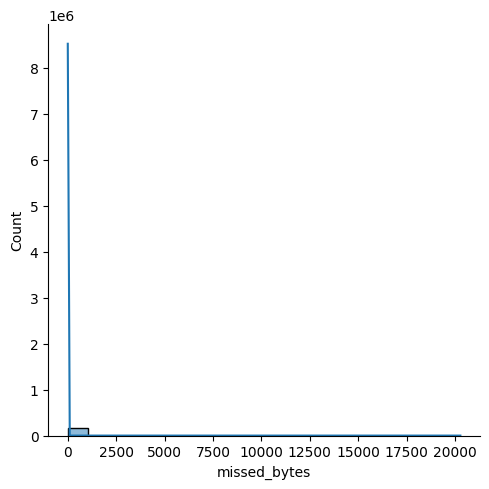

In [12]:
# Count the frequency of each unique value in the "missed_bytes" column and get percentages
value_counts = df['missed_bytes'].value_counts(normalize=True) * 100

# Print the unique values and their percentages
print(value_counts)

# Plot a distribution plot using Seaborn
sns.displot(df, x="missed_bytes", kde=True)


به دلیل این که ۹۹ درصد این ستون داده تکراری دارد آن را حذف می‌کنیم.

In [13]:
df = df.drop(columns = "missed_bytes")

# مشاهده‌ی جنس داده‌ی هر ستون

In [14]:
df_DataTypes = df.dtypes.to_frame().reset_index().rename(columns={"index": 'Column Name', 0: 'Data Type'})
df_DataTypes

,Column Name,Data Type
0,ts,float64
1,id.orig_h,object
2,id.orig_p,float64
3,id.resp_h,object
4,id.resp_p,float64
5,proto,object
6,conn_state,object
7,history,object
8,orig_pkts,float64
9,orig_ip_bytes,float64


# آمار توصیفی برای ستون‌های از جنس عدد



In [15]:
from IPython.display import display

# Generate descriptive statistics
desc_stats = df.describe()

# Display the output as a table
display(desc_stats)

,ts,id.orig_p,id.resp_p,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes
count,1.731140e+05,173114.000000,173114.000000,1.731140e+05,1.731140e+05,173114.000000,1.731140e+05
mean,1.542839e+09,37273.201705,14902.345177,1.056845e+01,1.048726e+04,1.889518,2.111680e+03
std,1.049306e+07,18523.509986,21442.424293,3.151147e+03,4.281467e+06,577.344552,8.403655e+05
min,1.525880e+09,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,1.533074e+09,24159.000000,23.000000,1.000000e+00,4.000000e+01,0.000000,0.000000e+00
50%,1.545429e+09,38370.000000,81.000000,1.000000e+00,6.000000e+01,0.000000,0.000000e+00
75%,1.547148e+09,51517.750000,37215.000000,2.000000e+00,8.000000e+01,0.000000,0.000000e+00
max,1.569019e+09,65526.000000,65528.000000,1.305034e+06,1.781371e+09,239484.000000,3.496187e+08


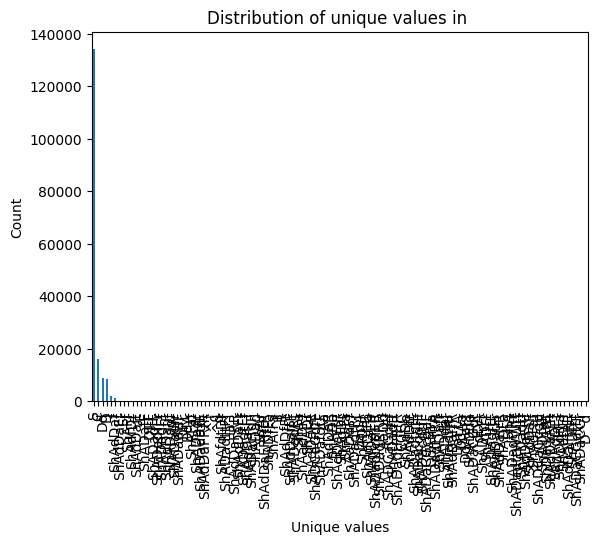

In [16]:
df["history"].value_counts().plot(kind='bar')
plt.title(f'Distribution of unique values in ')
plt.xlabel('Unique values')
plt.ylabel('Count')
plt.show()

# history تحلیل ستون

In [17]:
nunique = df['history'].nunique()

print(nunique)

116


In [18]:
#pd.set_option('display.max_rows', None)
df["history"].value_counts()

S              134022
C               16083
Dd               8814
D                8528
I                2049
                ...  
ShAdDaFfRR          1
ShADfFr             1
ShADaCGdtfF         1
ShADaCGr            1
D^d                 1
Name: history, Length: 116, dtype: int64

متوجه می‌شویم که این ستون دارای مقادیر یکتای بسیاری است. آن مقادیری که کمتر تکرار شده‌اند را در یک کتگوری قرار می‌دهیم.

## کم کردن ابعاد ستون histort


In [19]:
# replace categories with count < 1000 with "Other"
counts = df['history'].value_counts()
to_replace = counts[counts < 1000].index
df['history'] = df['history'].replace(to_replace, 'Other')

# perform one-hot encoding on the categorical column
#df_encoded = pd.get_dummies(df, columns=['history'])


In [20]:
df["history"].value_counts()

S          134022
C           16083
Dd           8814
D            8528
I            2049
Other        1790
ShAdDaf      1407
Name: history, dtype: int64

In [21]:
df["history"].isnull().sum()

421

از قبل می‌دانستیم که این ستون مقادیر خالی دارد. مقادیر خالی این ستون را با مد این ستون پر می‌کنیم.

## پر کردن مقادیر خالی ستون history

In [22]:
# Find mode of "history" column
mode_value = df['history'].mode()[0]

# Fill missing values with mode
df['history'] = df['history'].fillna(mode_value)

# اطمینان از نبودن مقادیر خالی

In [23]:
null_counts =  (df.isnull().sum() / len(df)) * 100

# Display the results as a dataframe
null_counts_df = pd.DataFrame(null_counts, columns=['null_count'])
null_counts_df


,null_count
ts,0.0
id.orig_h,0.0
id.orig_p,0.0
id.resp_h,0.0
id.resp_p,0.0
proto,0.0
conn_state,0.0
history,0.0
orig_pkts,0.0
orig_ip_bytes,0.0


# توزیع مقادیر یکتا برای ستون‌های اسمی

چون ستون هیستوری دارای مقادیر یکتای زیادی بود، قادیر به مصور سازی مقادیر یکتای آن نبودیم پس ابتدا آن را هندل کردیم و حال مقادیر یکتای ستون های از جنس اسم را مصور سازی می کنیم(به غیر از ستون های از جنس آی دی)

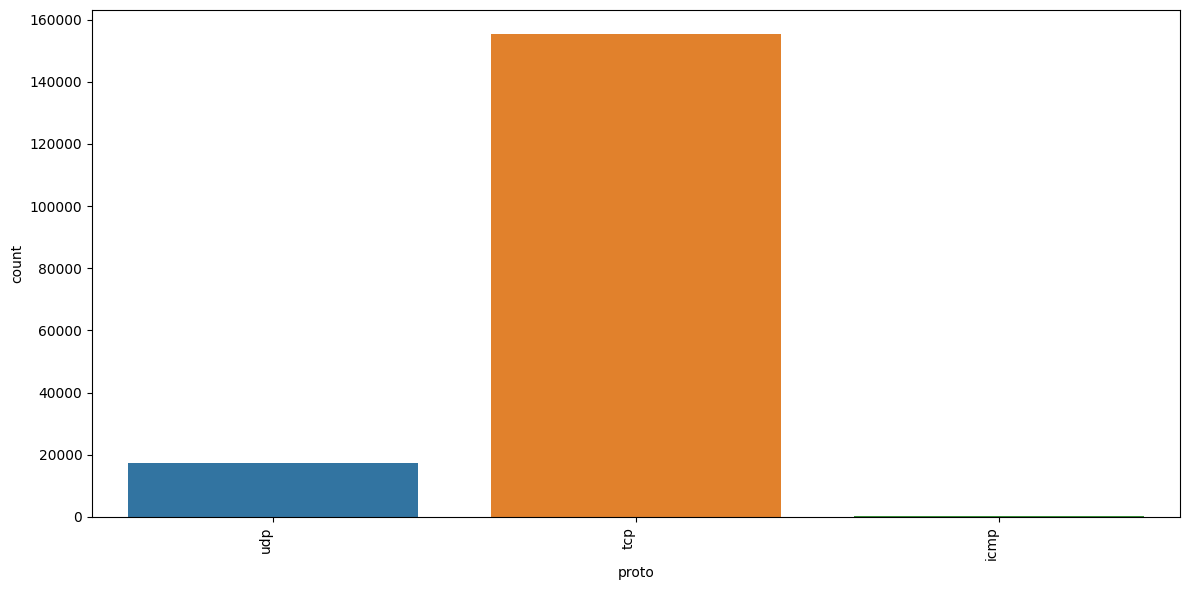

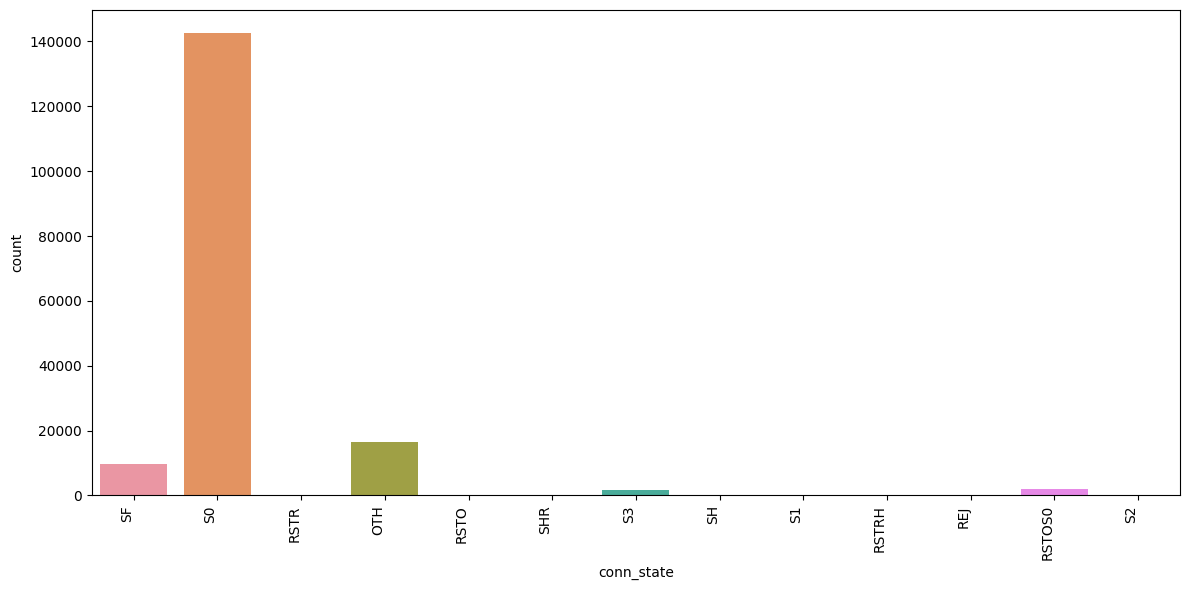

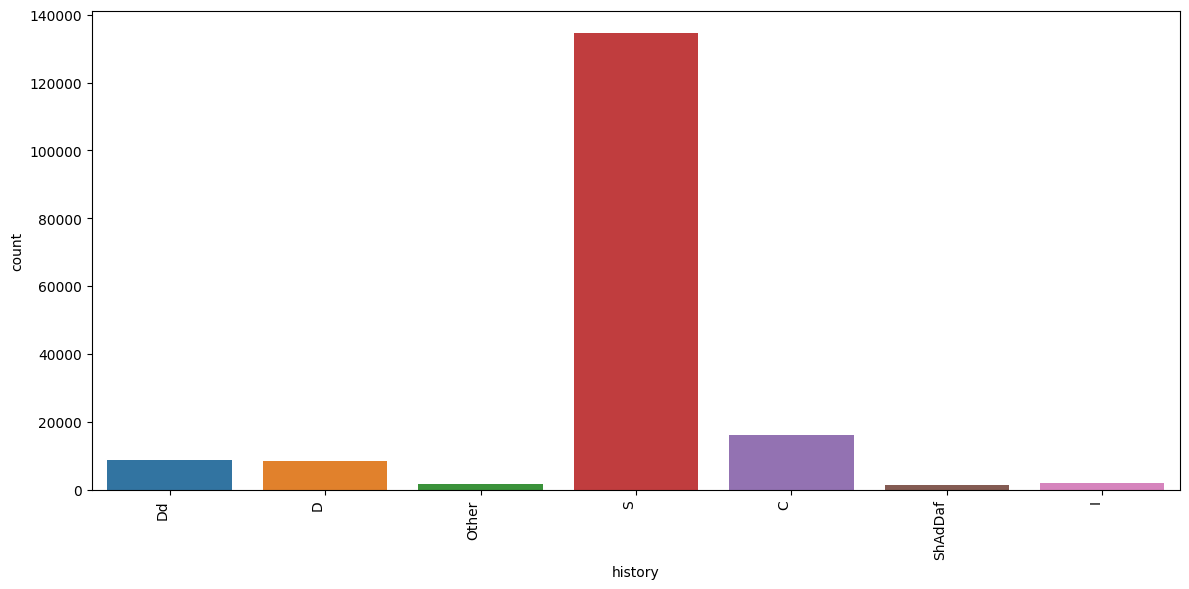

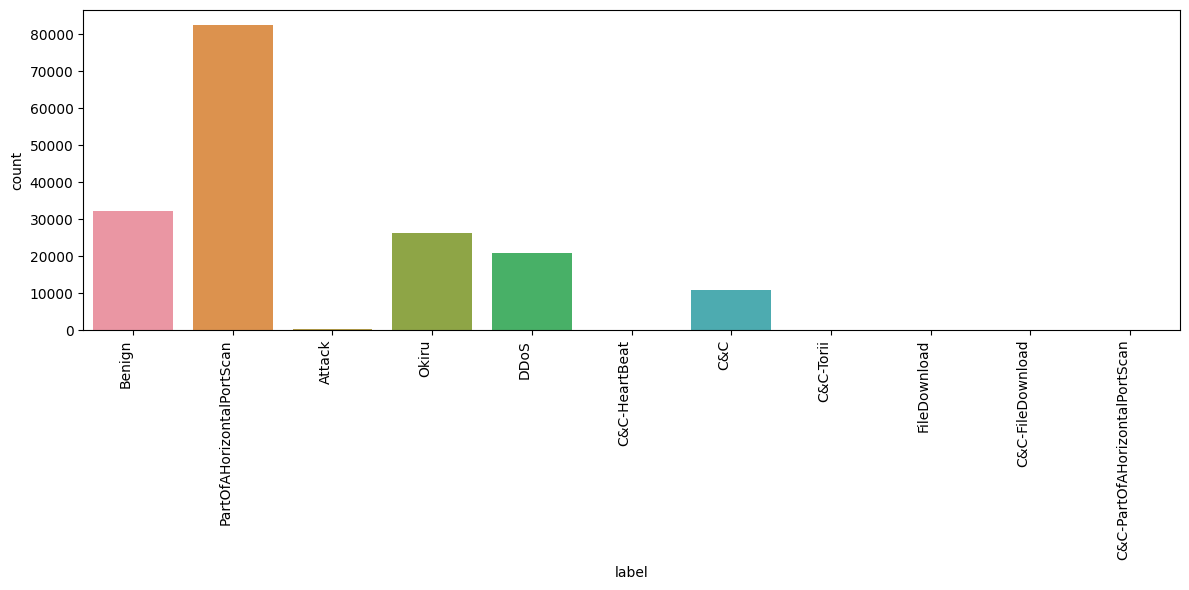

In [24]:
object_cols = ["proto", "conn_state", "history", "label"]

for col in object_cols:
    plt.figure(figsize=(12,6))
    ax = sns.countplot(x=col, data=df)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
    plt.tight_layout()
    plt.show()

# تحلیل ستون conn_state

In [25]:
df["conn_state"].value_counts()

S0        142556
OTH        16610
SF          9717
RSTOS0      2052
S3          1561
RSTR         246
REJ          224
SH           102
SHR           14
S1            14
RSTO          12
RSTRH          3
S2             3
Name: conn_state, dtype: int64

## کم کردن ابعاد ستون conn_state

In [26]:
counts = df['conn_state'].value_counts()
to_replace = counts[counts < 200].index
df['conn_state'] = df['conn_state'].replace(to_replace, 'Other')

In [27]:
df["conn_state"].value_counts()

S0        142556
OTH        16610
SF          9717
RSTOS0      2052
S3          1561
RSTR         246
REJ          224
Other        148
Name: conn_state, dtype: int64

# تحلیل ستون label

In [28]:
df["label"].value_counts()

PartOfAHorizontalPortScan        82490
Benign                           32209
Okiru                            26262
DDoS                             20860
C&C                              10863
Attack                             367
C&C-Torii                           30
C&C-HeartBeat                       15
C&C-FileDownload                    14
FileDownload                         3
C&C-PartOfAHorizontalPortScan        1
Name: label, dtype: int64

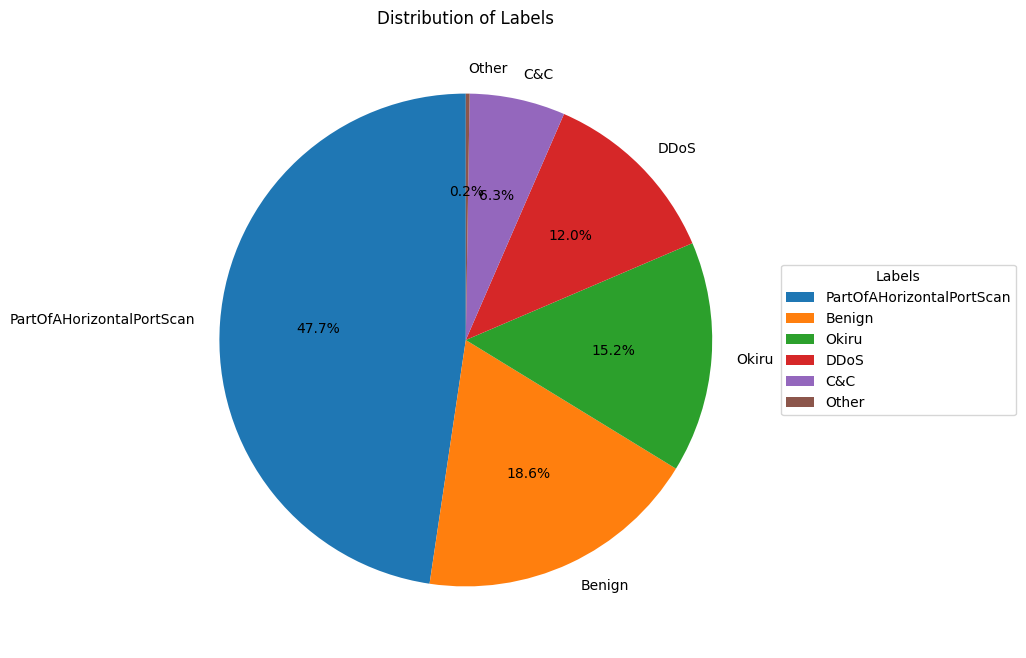

In [29]:
classes_to_keep = ['PartOfAHorizontalPortScan', 'Benign', 'Okiru', "DDoS", "C&C"]

# replace the values that are not in the specified classes with "Other"
df['label'] = df['label'].apply(lambda x: x if x in classes_to_keep else 'Other')

# count label values
label_counts = df["label"].value_counts()

# create pie chart
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90)
ax.set_title("Distribution of Labels")

# add legend
ax.legend(title="Labels", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# show plot
plt.show()

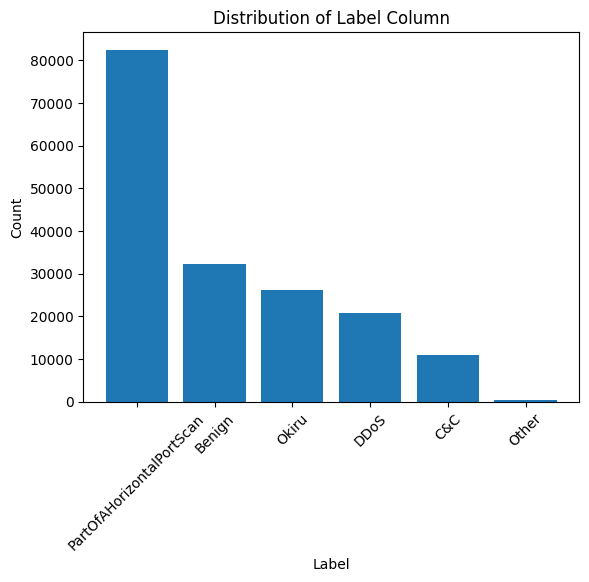

In [30]:
counts = df['label'].value_counts()

# Create a bar plot with the counts
fig, ax = plt.subplots()
ax.bar(counts.index, counts.values)

# Set the labels and title
ax.set_xlabel('Label')
ax.set_ylabel('Count')
ax.set_title('Distribution of Label Column')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

# حذف سطر‌های تکراری

In [31]:
# Count the number of duplicate rows in the DataFrame
num_duplicates = df.duplicated().sum()

# Drop the duplicate rows from the DataFrame
df.drop_duplicates(inplace=True)

# Print the number of duplicate rows that were removed
print(f"Removed {num_duplicates} duplicate rows.")


Removed 0 duplicate rows.


In [32]:
df.to_csv("/content/drive/MyDrive/مواد پایان نامه/مجموعه داده پیش پردازش شده مرحله ۱/iot23-sampled-P1.csv")

In [33]:
df

,ts,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,conn_state,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
0,1.540469e+09,192.168.1.132,58687.0,216.239.35.4,123.0,udp,SF,Dd,1.0,76.0,1.0,76.0,Benign
1,1.540469e+09,192.168.1.132,1900.0,239.255.255.250,1900.0,udp,S0,D,24.0,8208.0,0.0,0.0,Benign
2,1.540469e+09,192.168.1.132,32893.0,216.239.35.8,123.0,udp,SF,Dd,1.0,76.0,1.0,76.0,Benign
3,1.540470e+09,192.168.1.132,53395.0,2.16.60.82,443.0,tcp,SF,Other,5.0,212.0,3.0,144.0,Benign
4,1.540470e+09,192.168.1.132,52801.0,192.168.1.1,53.0,udp,SF,Dd,1.0,62.0,1.0,339.0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173109,1.569018e+09,192.168.1.195,11801.0,162.248.88.215,62336.0,tcp,OTH,C,0.0,0.0,0.0,0.0,DDoS
173110,1.569018e+09,192.168.1.195,2837.0,162.248.88.215,62336.0,tcp,OTH,C,0.0,0.0,0.0,0.0,DDoS
173111,1.569018e+09,192.168.1.195,1966.0,162.248.88.215,62336.0,tcp,OTH,C,0.0,0.0,0.0,0.0,DDoS
173112,1.569018e+09,192.168.1.195,40430.0,162.248.88.215,62336.0,tcp,OTH,C,0.0,0.0,0.0,0.0,DDoS
